# Machine Learning - Project 2 (**1/3**)

### Team Members:

Mauro Travieso Pena

Quoc Huy Luong

Ngoc Bao Tran



# Movie Recommendation System

## Recommendation engine from the content of the TMDB dataset that contains around 5'000 movies and TV series.

## Loading the dataset

### Datasets used [<a href='section1'>1</a>]

In [0]:
import pandas as pd 
import numpy as np 

df1=pd.read_csv('tmdb_5000_credits.csv')
df2=pd.read_csv('tmdb_5000_movies.csv')

In [2]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
movie_id    4803 non-null int64
title       4803 non-null object
cast        4803 non-null object
crew        4803 non-null object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


***In the first dataset, the following features and their corresponding descriptions are found:**

* **movie_id** - A unique identifier for each movie.

* **cast** - The name of lead and supporting actors.

* **crew** - The name of Director, Editor, Composer, Writer, etc.

In [3]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

***While the second dataset contains a total of 19 features:**

* **budget** - The budget in which the movie was made.-

* **genre** - The genre of the movie, Action, Comedy ,Thriller etc.

* **homepage** - A link to the homepage of the movie.

* **id** - This is infact the movie_id as in the first dataset.

* **keywords** - The keywords or tags related to the movie.

* **original_language** - The language in which the movie was made.

* **original_title** - The title of the movie before translation or adaptation.

* **overview** - A brief description of the movie.

* **popularity** - A numeric quantity specifying the movie popularity.

* **production_companies** - The production house of the movie.

* **production_countries** - The country in which it was produced.

* **release_date** - The date on which it was released.

* **revenue** - The worldwide revenue generated by the movie.

* **runtime** - The running time of the movie in minutes.

* **status** - "Released" or "Rumored".

* **tagline** - Movie's tagline.

* **title** - Title of the movie.

* **vote_average** - average ratings the movie recieved.

* **vote_count** - the count of votes recieved.

### Merging on id

In [0]:
df1.columns = ['id','tittle','cast','crew']
df2= df2.merge(df1,on='id')

****

## Exploratory Data Analysis Performing

In [5]:
df2.shape

(4803, 23)

### The dataset contains 4'803 rows separated in 23 colums of features. 

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 23 columns):
budget                  4803 non-null int64
genres                  4803 non-null object
homepage                1712 non-null object
id                      4803 non-null int64
keywords                4803 non-null object
original_language       4803 non-null object
original_title          4803 non-null object
overview                4800 non-null object
popularity              4803 non-null float64
production_companies    4803 non-null object
production_countries    4803 non-null object
release_date            4802 non-null object
revenue                 4803 non-null int64
runtime                 4801 non-null float64
spoken_languages        4803 non-null object
status                  4803 non-null object
tagline                 3959 non-null object
title                   4803 non-null object
vote_average            4803 non-null float64
vote_count              4803 non-null 

In [0]:
df2 = df2.drop(['tittle'], axis=1);

### It is appreciated the nature of Categorical and Numerical variables that conforms the dataset.

### To look more in detail the content of every row and column, the first elements are printed. 

In [8]:
df2.head().transpose()


,0,1,2,3,4
budget,237000000,300000000,245000000,250000000,260000000
genres,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam..."
homepage,http://www.avatarmovie.com/,http://disney.go.com/disneypictures/pirates/,http://www.sonypictures.com/movies/spectre/,http://www.thedarkknightrises.com/,http://movies.disney.com/john-carter
id,19995,285,206647,49026,49529
keywords,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":..."
original_language,en,en,en,en,en
original_title,Avatar,Pirates of the Caribbean: At World's End,Spectre,The Dark Knight Rises,John Carter
overview,"In the 22nd century, a paraplegic Marine is di...","Captain Barbossa, long believed to be dead, ha...",A cryptic message from Bond’s past sends him o...,Following the death of District Attorney Harve...,"John Carter is a war-weary, former military ca..."
popularity,150.438,139.083,107.377,112.313,43.927
production_companies,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""name"": ""Walt Disney Pictures"", ""id"": 2}]"


***

## Inspecting the Null values in the dataset and the contribution (%) on it from every one of the features.

### Definition of the functions to create an interface with the new structure of the dataset. [2]

In [0]:
import json
import pandas as pd

#___________________________
def load_tmdb_movies(path):
    df = pd.read_csv(path)
    df['release_date'] = pd.to_datetime(df['release_date']).apply(lambda x: x.date())
    json_columns = ['genres', 'keywords', 'production_countries',
                    'production_companies', 'spoken_languages']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df

#___________________________
def load_tmdb_credits(path):
    df = pd.read_csv(path)
    json_columns = ['cast', 'crew']
    for column in json_columns:
        df[column] = df[column].apply(json.loads)
    return df
  
#___________________
LOST_COLUMNS = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']

#____________________________________
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

#_____________________________________________________
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}

#_____________________________________________________
def safe_access(container, index_values):
    # return missing value rather than an error upon indexing/key failure
    result = container
    try:
        for idx in index_values:
            result = result[idx]
        return result
    except IndexError or KeyError:
        return pd.np.nan

#_____________________________________________________
def get_director(crew_data):
    directors = [x['name'] for x in crew_data if x['job'] == 'Director']
    return safe_access(directors, [0])

#_____________________________________________________
def pipe_flatten_names(keywords):
    return '|'.join([x['name'] for x in keywords])

#_____________________________________________________
def convert_to_original_format(movies, credits):
    tmdb_movies = movies.copy()
    tmdb_movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES, inplace=True)
    tmdb_movies['title_year'] = pd.to_datetime(tmdb_movies['release_date']).apply(lambda x: x.year)

    # I'm assuming that the first production country is equivalent, but have not been able to validate this
    tmdb_movies['country'] = tmdb_movies['production_countries'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['language'] = tmdb_movies['spoken_languages'].apply(lambda x: safe_access(x, [0, 'name']))
    tmdb_movies['director_name'] = credits['crew'].apply(get_director)
    tmdb_movies['actor_1_name'] = credits['cast'].apply(lambda x: safe_access(x, [1, 'name']))
    tmdb_movies['actor_2_name'] = credits['cast'].apply(lambda x: safe_access(x, [2, 'name']))
    tmdb_movies['actor_3_name'] = credits['cast'].apply(lambda x: safe_access(x, [3, 'name']))
    tmdb_movies['genres'] = tmdb_movies['genres'].apply(pipe_flatten_names)
    tmdb_movies['plot_keywords'] = tmdb_movies['plot_keywords'].apply(pipe_flatten_names)
    tmdb_movies['production_companies'] = tmdb_movies['production_companies'].apply(pipe_flatten_names)
    tmdb_movies['production_countries'] = tmdb_movies['production_countries'].apply(pipe_flatten_names)
    tmdb_movies['spoken_languages'] = tmdb_movies['spoken_languages'].apply(pipe_flatten_names)
    return tmdb_movies

In [0]:
#__________________
# load the dataset
credits = load_tmdb_credits("tmdb_5000_credits.csv")
movies = load_tmdb_movies("tmdb_5000_movies.csv")
df_initial = convert_to_original_format(movies, credits)

In [11]:
#__________________________________________
# info on variable types and filling factor
tab_info=pd.DataFrame(df_initial.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(df_initial.isnull().sum()/df_initial.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,production_countries,release_date,gross,duration,spoken_languages,status,tagline,movie_title,vote_average,num_voted_users,title_year,country,director_name,actor_1_name,actor_2_name,actor_3_name
column type,int64,object,object,int64,object,object,object,object,float64,object,object,object,int64,float64,object,object,object,object,float64,int64,float64,object,object,object,object,object
null values,0,0,3091,0,0,86,0,3,0,0,0,1,0,2,0,0,844,0,0,0,1,174,30,53,63,93
null values (%),0,0,64.3556,0,0,1.79055,0,0.062461,0,0,0,0.0208203,0,0.0416406,0,0,17.5724,0,0,0,0.0208203,3.62274,0.62461,1.10348,1.31168,1.93629


### When deeply inspecting, it is appreciated the number of null values per feature as well as the contribution (%) of every one of them in the dataset. This gives us a guideline to the cleaning process as well as to have a prior understanding of the  feature 'importance' to select the features to work with. 

In [0]:
df_initial.head();

***

## Exploring the missing values

In [13]:
missing_df = df_initial.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df['filling_factor'] = (df_initial.shape[0] 
                                - missing_df['missing_count']) / df_initial.shape[0] * 100
missing_df.sort_values('filling_factor').reset_index(drop = True)


,column_name,missing_count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,country,174,96.377264
3,actor_3_name,93,98.063710
4,language,86,98.209452
5,actor_2_name,63,98.688320
6,actor_1_name,53,98.896523
7,director_name,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


### It is seen that the most of the features have a filling factor close to 100%. However, the first two are below 95%.

/usr/local/lib/python3.6/dist-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['fantasy'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


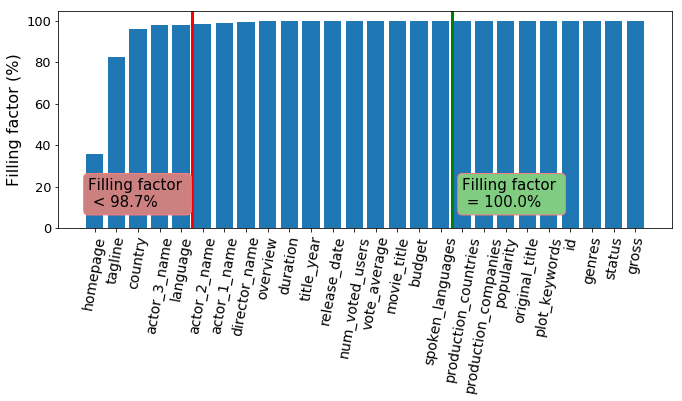

In [14]:
import matplotlib.pyplot as plt

missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
y_axis = missing_df['filling_factor'] 
x_label = missing_df['column_name']
x_axis = missing_df.index

fig = plt.figure(figsize=(11, 4))
plt.xticks(rotation=80, fontsize = 14)
plt.yticks(fontsize = 13)

N_thresh = 5
plt.axvline(x=N_thresh-0.5, linewidth=3, color = 'r')
plt.text(N_thresh-5.3, 10, 'Filling factor \n < {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1.0, 0.5, 0.5),
                   fc=(0.8, 0.5, 0.5)))
N_thresh = 17
plt.axvline(x=N_thresh-0.47, linewidth=3, color = 'g')
plt.text(N_thresh, 10, 'Filling factor \n = {}%'.format(round(y_axis[N_thresh],1)),
         fontsize = 15, family = 'fantasy', bbox=dict(boxstyle="round",
                   ec=(1., 0.5, 0.5),
                   fc=(0.5, 0.8, 0.5)))
plt.xticks(x_axis, x_label,family='fantasy', fontsize = 14 )
plt.ylabel('Filling factor (%)', family='fantasy', fontsize = 16)
plt.bar(x_axis, y_axis);

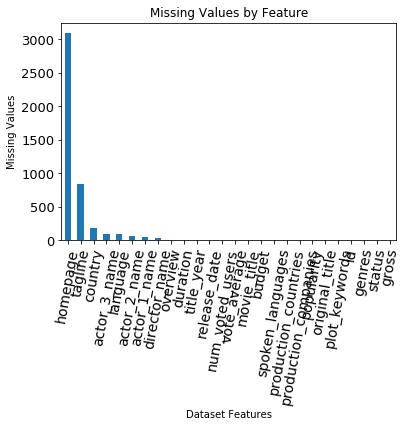

In [15]:
missing_df['missing_count'].plot.bar().set_title("Missing Values by Feature")
missing_df['missing_count'].plot.bar().set_xlabel('Dataset Features')
missing_df['missing_count'].plot.bar().set_ylabel('Missing Values')
y_axis = missing_df['filling_factor']
x_label = missing_df['column_name']
plt.xticks(rotation=80, fontsize = 14)
plt.yticks(fontsize = 13)
plt.xticks(x_axis, x_label,family='fantasy', fontsize = 14 );

### The majority of the Missing values count and Filling factor is in the first 2 features. Also, they can be dropped from the dataset because they are not relevant for the analysis, and won't affect the final result accuracy.

***

## Numerical features analysis and selection

In [16]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


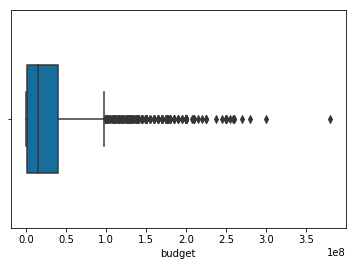

In [17]:
import seaborn as sns

bplot = sns.boxplot(x='budget', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

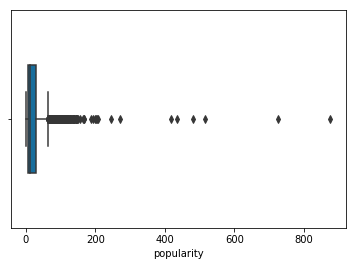

In [18]:
bplot = sns.boxplot(x='popularity', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

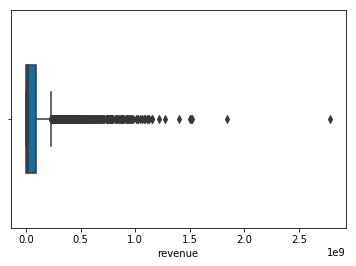

In [19]:
bplot = sns.boxplot(x='revenue', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

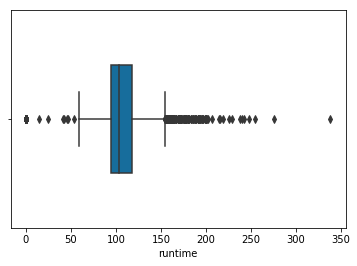

In [20]:
bplot = sns.boxplot(x='runtime', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

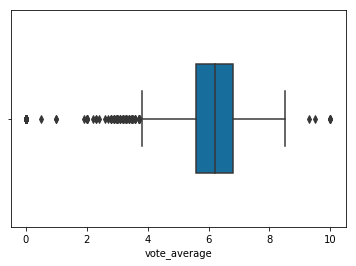

In [21]:
bplot = sns.boxplot(x='vote_average', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

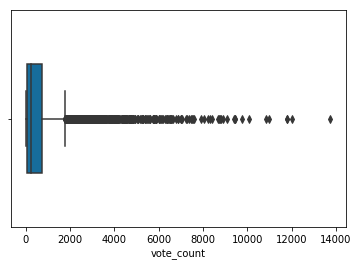

In [22]:
bplot = sns.boxplot(x='vote_count', 
                 data=df2, 
                 width=0.5,
                 palette="colorblind")

### The variable 'id' is not important in the statistical analysis because it represents a numerical identifier to the movie.

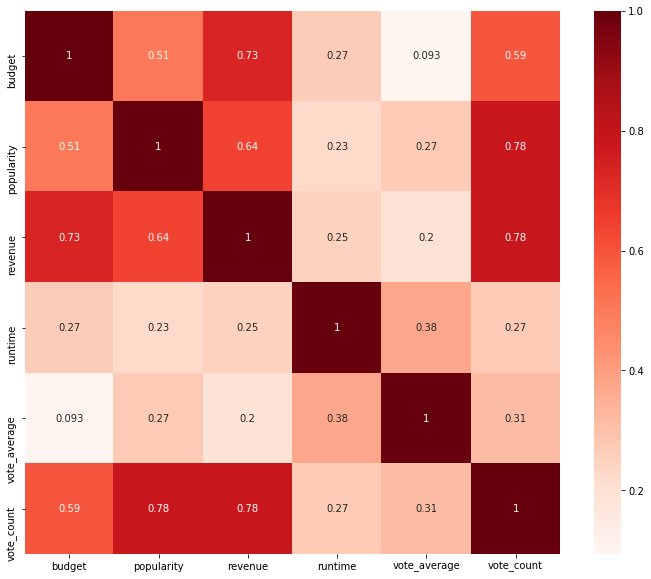

In [23]:
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = df2.drop(['id'], axis=1).corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### Budget, popularity and revenue show an important correlation (positive) between them and in respect to the vote count. 

### Features 'vote_average' and 'vote_count' are used to calculate the rating score. 

### Feature 'runtime'  is the least linearly correlated, so it doesn't show signs of being associated to latent features. As a result, it counts with high probability to be not considered in the model and can be droped.  

***

### Feature selection [3]

In [0]:
# Add a new column rating class 
df2['Class']=1 #df['rating']
df2.sample(5);

In [0]:
# 1: High
# or 0: Low based on rating
df2.loc[df2['vote_average'] >= df2['vote_average'].mean(), 'Class'] = 1
df2.loc[df2['vote_average'] < df2['vote_average'].mean(), 'Class'] = 0

In [0]:
df2.sample(5);

In [27]:
df2.shape

(4803, 23)

In [0]:
df2n = df2.drop(['id','genres','homepage','original_language','keywords','original_title',	'overview',	'production_companies',	'production_countries',	'release_date',	'spoken_languages',	'status', 'tagline',	
                 'title',	'cast',	'crew'], axis=1) 
df2n = df2n.dropna()
X = df2n.iloc[:,0:6]  #independent columns
y = df2n.iloc[:,-1]    #target column

In [29]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# feature_names = [i for i in df2.columns if df2[i].dtype in [np.int64]]
# X = df2[feature_names]
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=1)
my_model = RandomForestClassifier(random_state=0).fit(train_X, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


### Permutations importance [6]

### Feature selection with eli5

In [0]:
!pip install -q eli5

In [31]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(my_model, random_state=1).fit(val_X, val_y)
eli5.show_weights(perm, feature_names = val_X.columns.tolist())

Weight,Feature
0.4846 ± 0.0375,vote_average
0 ± 0.0000,vote_count
0 ± 0.0000,runtime
0 ± 0.0000,revenue
0 ± 0.0000,popularity
0 ± 0.0000,budget


### Interpreting Permutation Importances

### The values towards the top are the most important features, and those towards the bottom matter the least.

### The first number in each row shows how much model performance decreased with a random shuffling (in this case, using "accuracy" as the performance metric).



***

### Univariate Selection

In [32]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top k best features
bestfeatures = SelectKBest(score_func=chi2, k='all')
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print k best features

          Specs         Score
2       revenue  4.114443e+10
0        budget  3.517371e+08
5    vote_count  6.775564e+05
1    popularity  1.011001e+04
3       runtime  2.128314e+03
4  vote_average  5.471072e+02


### The SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

### The chi-squared (chi²) statistical test for non-negative features is used to select 10 of the best features from the Dataset.

***

### Feature Importance

[0.02839228 0.03876777 0.02683631 0.05430297 0.79990448 0.05179619]


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


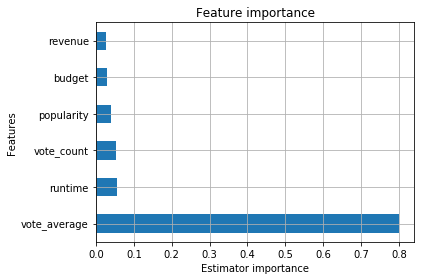

In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

plt.title('Feature importance')
plt.xlabel('Estimator importance')
plt.ylabel('Features')
plt.grid(True)

plt.tight_layout()

plt.show()


### Feature importance gives a score for each feature of your data, the higher the score more important or relevant is the feature towards the output variable.

### Feature importance is an inbuilt class that comes with Tree Based Classifiers, the Extra Tree Classifier is used for extracting the top 10 features for the dataset.

### Parallel Coordinates [4]

#### 1: High vote_average     /   0: Low vote_average

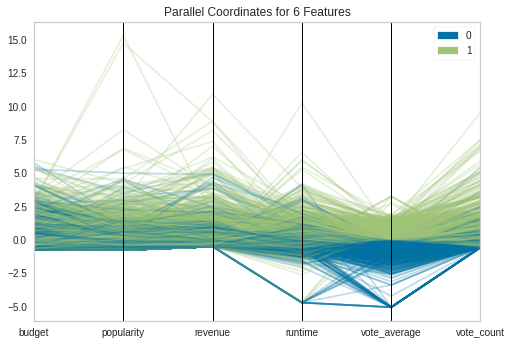

In [34]:
from yellowbrick.features import ParallelCoordinates

# Instantiate the visualizer
visualizer = ParallelCoordinates(sample=0.5, normalize='standard', shuffle=True)

# Fit and transform the data to the visualizer
visualizer.fit_transform(X, y)

# Finalize the title and axes then display the visualization
visualizer.poof()

### Now we can see that each feature is in the range [-5, 15] where the mean of the feature is set to zero and each feature has a unit variance applied between [-1, 1] (because we’re using the StandardScaler via the standard normalize parameter). 

### This version of parallel coordinates gives a much better sense of the distribution of the features and if any features are highly variable with respect to any one class.

### The vote_average feature clearly shows a factor of decision in respect to the raiting prediction [-2,3], while the runtime feature shows the opposite. [5]

***

### Embedded Method

### Here we will do feature selection using Lasso regularization. If the feature is irrelevant, Lasso penalizes it’s coefficient and make it 0. Hence the features with coefficient = 0 are removed and the rest are taken. [7]


In [35]:
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)


Best alpha using built-in LassoCV: 4010574.251912
Best score using built-in LassoCV: 0.024109


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [36]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 5 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

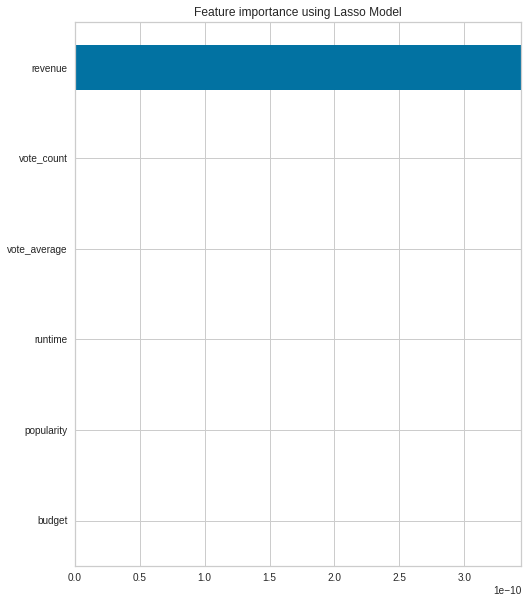

In [37]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

***

### Recursive Feature Elimination [10]

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

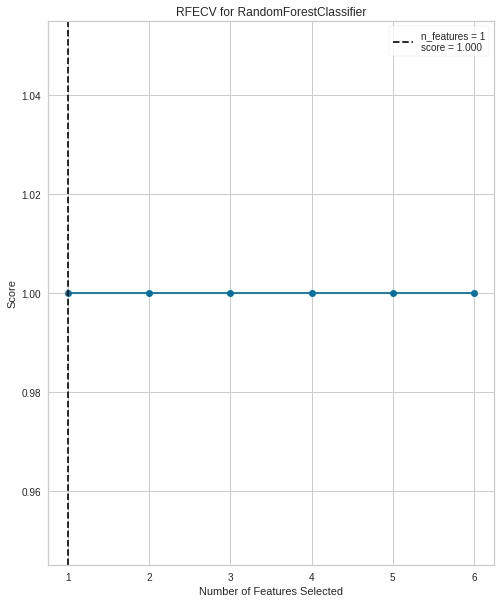

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from yellowbrick.features import RFECV

cv = StratifiedKFold(5)
oz = RFECV(RandomForestClassifier(), cv=cv, scoring='f1_weighted')

oz.fit(X, y)
oz.poof()

### Recursive feature elimination (RFE) is a feature selection method that fits a model and removes the weakest feature (or features) until the specified number of features is reached. 

### Features are ranked by the model’s coef_ or feature_importances_ attributes, and by recursively eliminating a small number of features per loop, RFE attempts to eliminate dependencies and collinearity that may exist in the model.

***

## Categorical features analysis and selection

In [39]:
ds_cat = df_initial.select_dtypes(include = 'object').copy()
ds_cat.head(2)



,genres,homepage,plot_keywords,language,original_title,overview,production_companies,production_countries,release_date,spoken_languages,status,tagline,movie_title,country,director_name,actor_1_name,actor_2_name,actor_3_name
0,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,culture clash|future|space war|space colony|so...,English,Avatar,"In the 22nd century, a paraplegic Marine is di...",Ingenious Film Partners|Twentieth Century Fox ...,United States of America|United Kingdom,2009-12-10,English|Español,Released,Enter the World of Pandora.,Avatar,United States of America,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,ocean|drug abuse|exotic island|east india trad...,English,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",Walt Disney Pictures|Jerry Bruckheimer Films|S...,United States of America,2007-05-19,English,Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,United States of America,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård


In [0]:
set_keywords = set()
for liste_keywords in df_initial['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

In [0]:
def count_word(df, ref_col, liste):
    keyword_count = dict()
    for s in liste: keyword_count[s] = 0
    for liste_keywords in df[ref_col].str.split('|'):        
        if type(liste_keywords) == float and pd.isnull(liste_keywords): continue        
        for s in [s for s in liste_keywords if s in liste]: 
            if pd.notnull(s): keyword_count[s] += 1
    #______________________________________________________________________
    # convert the dictionary in a list to sort the keywords by frequency
    keyword_occurences = []
    for k,v in keyword_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key = lambda x:x[1], reverse = True)
    return keyword_occurences, keyword_count

In [0]:
genre_labels = set()
for s in df_initial['genres'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [43]:
keyword_occurences, dum = count_word(df_initial, 'genres', genre_labels)
keyword_occurences[:5]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894]]

### Among genres, Drama is the most commonly produced.

In [0]:
set_keywords = set()
for liste_keywords in df_initial['plot_keywords'].str.split('|').values:
    if isinstance(liste_keywords, float): continue  # only happen if liste_keywords = NaN
    set_keywords = set_keywords.union(liste_keywords)
#_________________________
# remove null chain entry
set_keywords.remove('')

In [45]:
keyword_occurences, dum = count_word(df_initial, 'plot_keywords', genre_labels)
keyword_occurences[:5]

[['', 412], ['Western', 0], ['Adventure', 0], ['TV Movie', 0], ['War', 0]]

### Among most common keywords used to describe a movie plot, woman director is the most commonly mentioned followed by independent film.

In [0]:
genre_labels = set()
for s in df_initial['production_companies'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [47]:
keyword_occurences, dum = count_word(df_initial, 'production_companies', genre_labels)
keyword_occurences[:5]

[['', 351],
 ['Warner Bros.', 319],
 ['Universal Pictures', 311],
 ['Paramount Pictures', 285],
 ['Twentieth Century Fox Film Corporation', 222]]

### Warner Bros is the production company with most film productions, closely followed by Universal and Paramount Pictures.

In [0]:
genre_labels = set()
for s in df_initial['spoken_languages'].str.split('|').values:
    genre_labels = genre_labels.union(set(s))

In [49]:
keyword_occurences, dum = count_word(df_initial, 'spoken_languages', genre_labels)
keyword_occurences[:5]

[['English', 4485],
 ['Français', 437],
 ['Español', 351],
 ['Deutsch', 262],
 ['Italiano', 188]]

### The most common spoken language found in the movies is English, which folds 10 times the rest of the movies original languages.

### However, the remaining plot communication speechs are closely produced with relative significative proximity.

***

## Data Wrangling (from JSON file to CSV)

In [50]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew,Class
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",1
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",1
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",1
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",1
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",1


In [0]:
df2 = df2.drop(['id'], axis=1)

In [52]:
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


### The original title refers to the title of the movie in the native language in which the movie was shot. It is desirable to use the translated, Anglicized name for the analysis and hence, will drop the original titles altogether. 

### It will be deduced if the movie is a foreign language film by looking at the original_language feature so no tangible information is lost in doing so.

In [0]:
df2 = df2.drop('original_title', axis=1)

In [54]:
df2[df2['revenue'] == 0].shape

(1427, 21)

### It is appreciated that almost 30% of the movies have a recorded revenue of 0. This indicates that not enough information about the total revenue for these movies is present.

### Although, the feature revenue will be kept as an extremely important feature going forward from the remaining movies.

In [0]:
df2['revenue'] = df2['revenue'].replace(0, np.nan)

### In the same order of ideas, by inspecting the budget feature, it is found that it has some unclean values that makes Pandas assign it as a generic object. 

### We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [56]:
df2['budget'] = pd.to_numeric(df2['budget'], errors='coerce')
df2['budget'] = df2['budget'].replace(0, np.nan)
df2[df2['budget'].isnull()].shape

(1037, 21)

### The return feature is extremely insightful as it will give us a more accurate picture of the financial success of a movie. 

### A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [57]:
df2['return'] = df2['revenue'] / df2['budget']
df2[df2['return'].isnull()].shape

(1574, 22)

### Close to 33% of the movies for which we have data on revenue and budget ratio. 

### Although this may seem small, this is enough to perform very useful analysis and discover interesting insights about the world of movies.

In [0]:
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [59]:
df2['year'].describe()

count     4803
unique      91
top       2009
freq       247
Name: year, dtype: object

***

In [60]:
df2['year'].drop_duplicates().shape[0]

91

Text(0.5, 1.0, 'Number of movies produced by year')

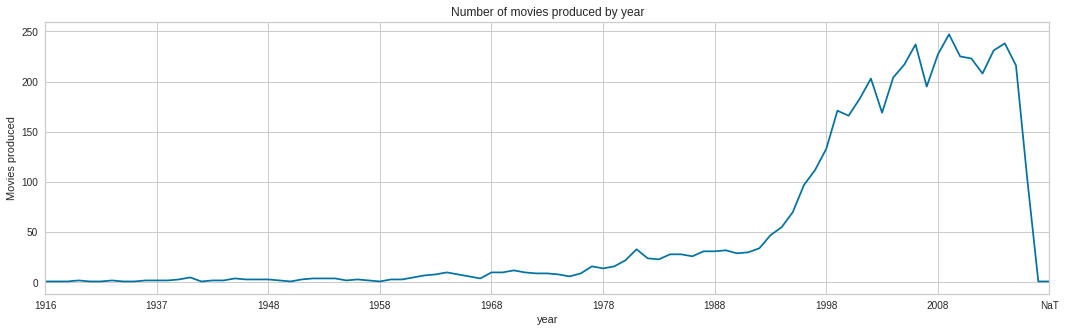

In [61]:
year_count = df2.groupby('year')['title'].count()
plt.figure(figsize=(18,5))
plt.ylabel("Movies produced")
year_count.plot().set_title('Number of movies produced by year')

### As it can be seen in the plot, the boom of the movies produced starts in the 1990's, being 2005 the year with more movies releasing.

## Title and Overview WordClouds

In [0]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')

In [0]:
title_corpus = ' '.join(df2['title'])
overview_corpus = ' '.join(df2['overview'])

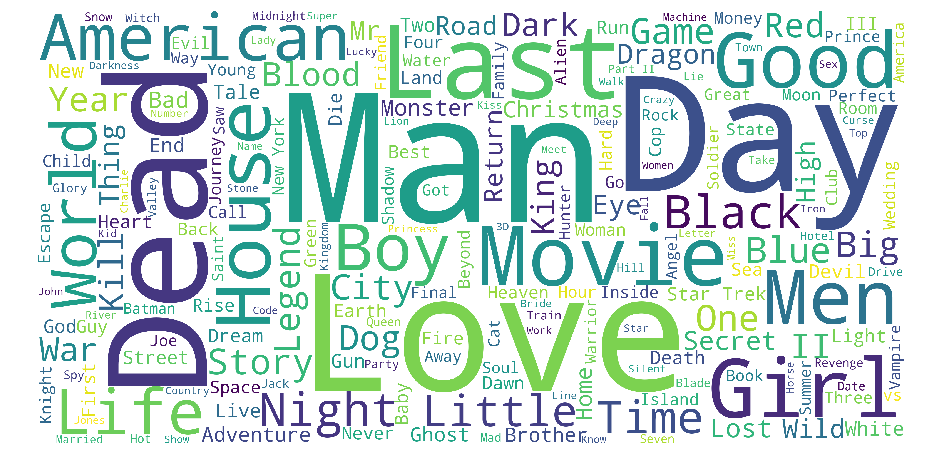

In [64]:
from wordcloud import WordCloud, STOPWORDS

title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### The word Love is the most commonly used word in movie titles. Dead, Day and Man are also among the most commonly occuring words. It sugests the idea of the commonly presence of romance and horror in movies.

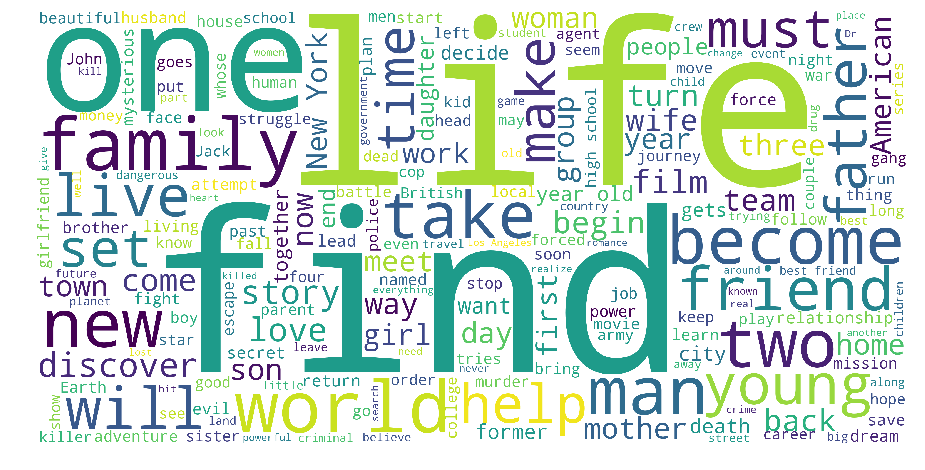

In [65]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Life is the most commonly used word in Movie titles. One and Find are also popular in Movie Blurbs. Together with Love, Man and Dead, these wordclouds give us a clear idea of the most popular themes movies are related to.

***

## Production Countries

In [0]:
import ast

df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval)
df2['production_countries'] = df2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
s = df2.apply(lambda x: pd.Series(x['production_countries']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'countries'

In [68]:
con_df = df2.drop('production_countries', axis=1).join(s)
con_df = pd.DataFrame(con_df['countries'].value_counts())
con_df['country'] = con_df.index
con_df.columns = ['num_movies', 'country']
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(10)

,num_movies,country
0,3956,United States of America
1,636,United Kingdom
2,324,Germany
3,306,France
4,261,Canada
5,110,Australia
6,72,Italy
7,71,Spain
8,59,China
9,58,Japan


### The table show the most popular countries where movies are produced in the world. It represents, the association with the most common language.

In [0]:
#df2['production_countries'] = df2['production_countries'].fillna('[]').apply(ast.literal_eval)
#df2['production_countries'] = df2['production_countries'].apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [0]:
con_df = con_df[con_df['country'] != 'United States of America']

In [0]:
import plotly.offline as py
py.init_notebook_mode(connected=True)

data = [ dict(
        type = 'choropleth',
        locations = con_df['country'],
        locationmode = 'country names',
        z = con_df['num_movies'],
        text = con_df['country'],
        colorscale = [[0,'rgb(255, 255, 255)'],[1,'rgb(255, 0, 0)']],
        autocolorscale = False,
        reversescale = False,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Production Countries'),
      ) ]

layout = dict(
    title = 'Production Countries for the MovieLens Movies (Apart from US)',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map' )

***

## Original Language

In [72]:
df2['original_language'].drop_duplicates().shape[0]

37

In [73]:
lang_df = pd.DataFrame(df2['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

,number,language
en,4505,en
fr,70,fr
es,32,es
de,27,de
zh,27,zh


### From the 37 languages represented in the dataset. As previously shown, English language films are the overwhelmingly majority. 

### In second and third place, French and Spanish movies come at a very distant place respectively. 

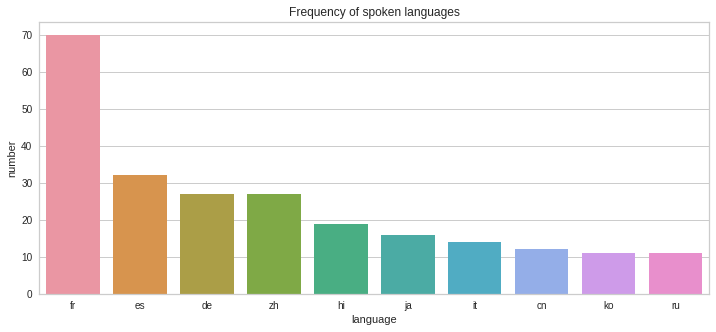

In [74]:
plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[1:11]).set_title('Frequency of spoken languages')
plt.show()

***

## Popularity, Vote Average and Vote Count

In [0]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [0]:
df2['popularity'] = df2['popularity'].apply(clean_numeric).astype('float')
df2['vote_count'] = df2['vote_count'].apply(clean_numeric).astype('float')
df2['vote_average'] = df2['vote_average'].apply(clean_numeric).astype('float')

In [77]:
df2['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

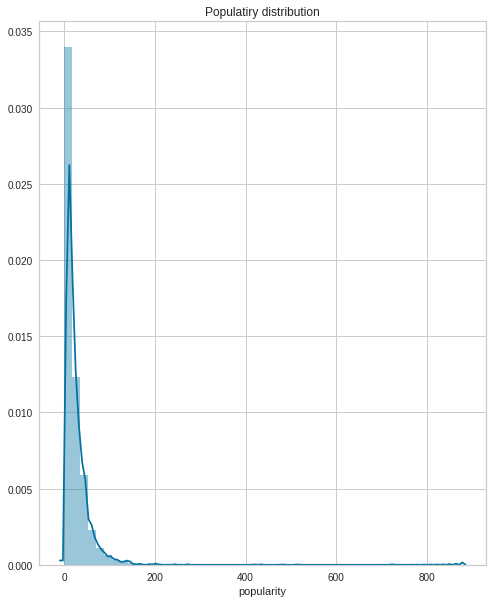

In [78]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].median())).set_title('Populatiry distribution')
plt.show()

Text(0.5, 0, 'Popularity')

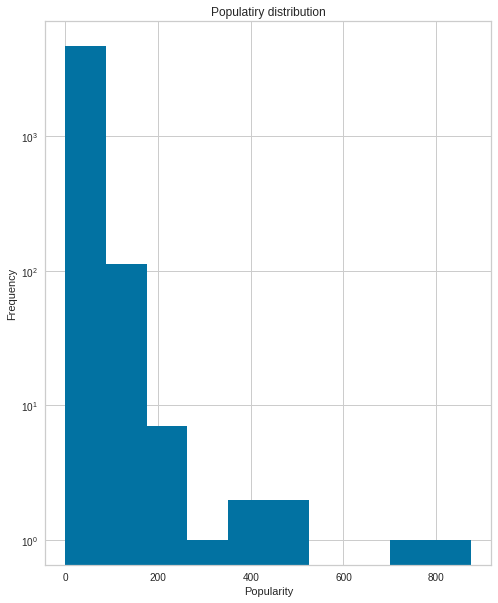

In [79]:
df2['popularity'].plot(logy=True, kind='hist').set_title('Populatiry distribution')
plt.xlabel("Popularity")

### The Popularity score seems to be an extremely skewed quentity with a mean of only 21.49 but maximum values reaching as high as 835, which is almost 3886% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

***

## Most Popular Movies by Popularity Score

In [80]:
df2[['title', 'popularity', 'year']].sort_values('popularity', ascending=False).head(10)

,title,popularity,year
546,Minions,875.581305,2015
95,Interstellar,724.247784,2014
788,Deadpool,514.569956,2016
94,Guardians of the Galaxy,481.098624,2014
127,Mad Max: Fury Road,434.278564,2015
28,Jurassic World,418.708552,2015
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889,2003
82,Dawn of the Planet of the Apes,243.791743,2014
200,The Hunger Games: Mockingjay - Part 1,206.227151,2014
88,Big Hero 6,203.734590,2014


In [81]:
df2['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

### In respect to popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a 235 votes. The most votes a single movie has got stands at 13'752.

***

## Most Voted Movies

In [82]:
df2[['title', 'vote_count', 'year']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count,year
96,Inception,13752.0,2010
65,The Dark Knight,12002.0,2008
0,Avatar,11800.0,2009
16,The Avengers,11776.0,2012
788,Deadpool,10995.0,2016
95,Interstellar,10867.0,2014
287,Django Unchained,10099.0,2012
94,Guardians of the Galaxy,9742.0,2014
426,The Hunger Games,9455.0,2012
127,Mad Max: Fury Road,9427.0,2015


Text(0.5, 1.0, 'Vote average distribution')

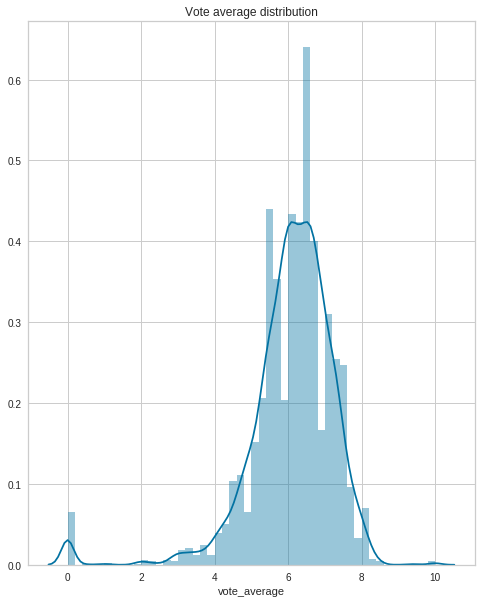

In [83]:
sns.distplot(df2['vote_average'].fillna(df2['vote_average'].median())).set_title('Vote average distribution')

### Users are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6.

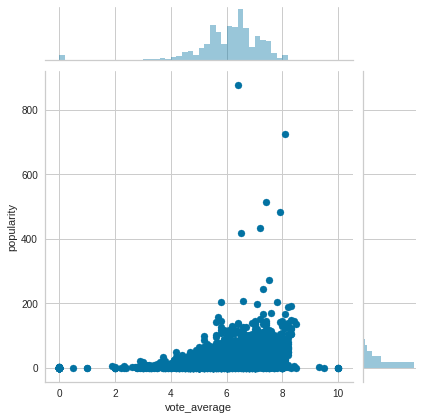

In [84]:
sns.jointplot(x='vote_average', y='popularity', data=df2)

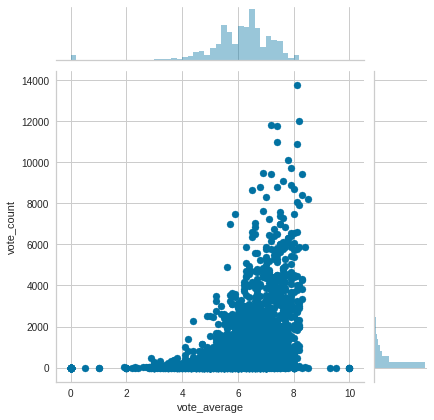

In [85]:
sns.jointplot(x='vote_average', y='vote_count', data=df2)

### The plot shows that there is a very small correlation between Vote Count and Vote Average. A large number of votes on a particular movie does not necessarily imply that the movie is good.

***

## Budget

In [86]:
df2['budget'].describe()

count    3.766000e+03
mean     3.704284e+07
std      4.264651e+07
min      1.000000e+00
25%      8.000000e+06
50%      2.300000e+07
75%      5.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

### The mean budget of a film is 37.04 million dollars whereas the median budget is far smaller at 27 million dollars. This strongly suggests the mean being influenced by outliers.

Text(0.5, 1.0, 'Budget distribution')

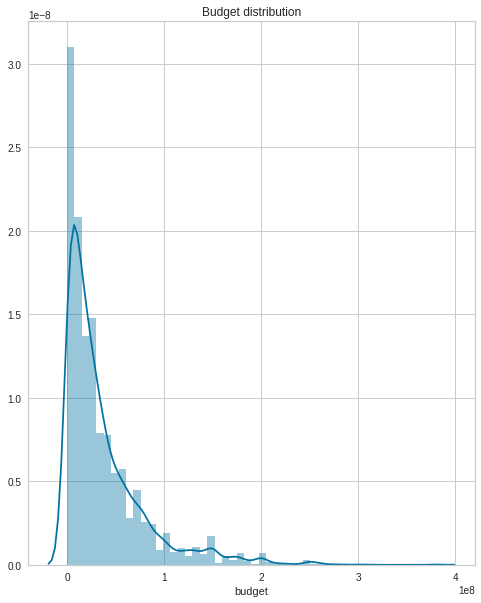

In [87]:
sns.distplot(df2[df2['budget'].notnull()]['budget']).set_title('Budget distribution')

### The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 150 million dollars. 

***

## Revenue

In [88]:
df2['revenue'].describe()

count    3.376000e+03
mean     1.170314e+08
std      1.834831e+08
min      5.000000e+00
25%      1.535290e+07
50%      5.175184e+07
75%      1.401651e+08
max      2.787965e+09
Name: revenue, dtype: float64

### The mean gross of a movie is 117 million dollars whereas the median gross is much lower at 51.8 million dollars, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is just 5 dollars whereas the highest grossing movie of all time has raked in an astonishing 2.78 billion dollars.

Text(0.5, 1.0, 'Revenue distribution')

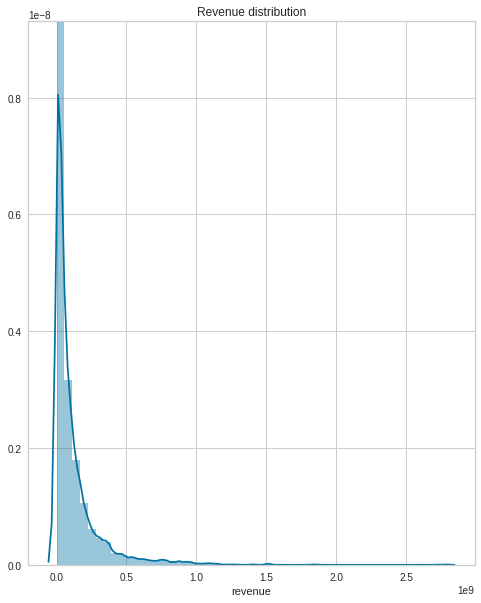

In [89]:
sns.distplot(df2[df2['revenue'].notnull()]['revenue']).set_title('Revenue distribution')

### The distribution of revenue undergoes exponential decay just like budget. We also found that the two quantities were strongly correlated. Let us now take a look at the highest and least grossing movies of all time.

***

## Correlation Matrix

In [0]:
df2['year'] = df2['year'].replace('NaT', np.nan)

In [0]:
df2['year'] = df2['year'].apply(clean_numeric)
df2 = df2.drop(['Class'], axis=1);

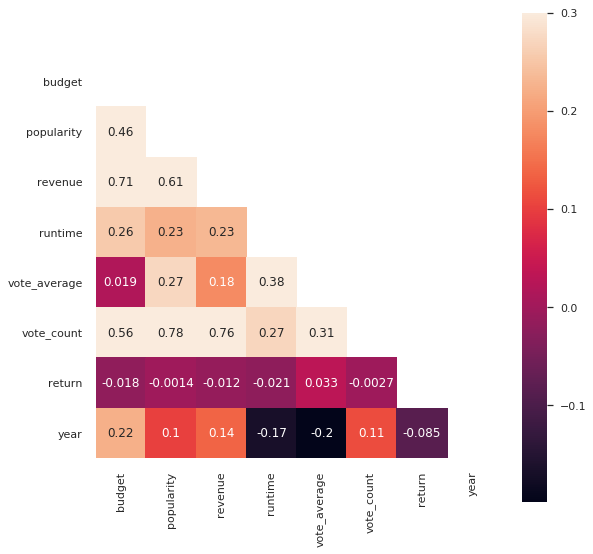

In [92]:
sns.set(font_scale=1)
corr = df2.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    plt.figure(figsize=(9,9))
    ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True, annot=True)

### When processing the data (cleaning, fillingNa), it is appreciated the linear relation (correlation) among the numerical features in the dataset.

### Revenue, budget, and popularity establish a strong positive correlation with vote count, which makes it a target feature. 

### In respect to the year and return, even though they could offer more precise information, they show little contribution to every posterior analysis, prediction or classification.

***

# References

[<a id='section1'> 1 </a>] https://www.kaggle.com/fabiendaniel/film-recommendation-engine#Film-recommendation-engine

[2] https://www.kaggle.com/sohier/film-recommendation-engine-converted-to-use-tmdb

[3] https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

[4] http://www.scikit-yb.org/en/latest/api/features/pcoords.html?fbclid=IwAR3IglPIqy3-5TOK0rX3xC9l6kDFLrrCsOVB6P7ZbLqaM2ff-rBk4PWRccA#parallel-coordinates

[5] https://www.youtube.com/watch?v=VmKUVXaKQt0

[6] https://www.kaggle.com/dansbecker/permutation-importance?fbclid=IwAR22vVgEcsMx5x9d_P24VWW-xVFNtC6qdskg6wmzcKULLXdT9qSl8HoF3mg

[7] https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b

[8] https://scikit-learn.org/stable/modules/feature_selection.html

[9] https://www.kaggle.com/rounakbanik/the-story-of-film/

[10] https://www.scikit-yb.org/en/latest/api/features/rfecv.html